# Data Analysis Project Using Python
## Blinkit Sales Analysis

### Install and Import Libraries

In [6]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [8]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Raw Data

In [10]:
df = pd.read_csv("C:/Users/USER/Downloads/Blinkit Analysis/blinkit_data.csv")

### Sample Data

In [11]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


### Number of Rows and Column in the dataset

In [13]:
print("Size of Data: ", df.shape)

Size of Data:  (8523, 12)


### Retrieve Column Names

In [14]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

### Retrieve the Data Types of the Column Headers

In [15]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

## Data Cleaning

In [30]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


### Make the Item fat content consistent by replacing different spellings of Low Fat

In [29]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'low fat': 'Low Fat', 
                                                         'LF': 'Low Fat',
                                                        'Reg': 'Regular'})
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


## KPI's Requirements

In [32]:
# Total Sales
total_sales = df['Sales'].sum()

# Average Sales
avg_sales = df['Sales'].mean()

# Number of Items Sold
no_of_items_sold = df['Sales'].count()

# Average Ratings
avg_ratings = df['Rating'].mean()

# Display the results

print(f"Total Sales: ${total_sales:,.0f}")
print(f"Average Sales: ${avg_sales:,.0f}")
print(f"Number of Items Sold: {no_of_items_sold}")
print(f"Average Ratings: {avg_ratings:,.2f}")

Total Sales: $1,201,681
Average Sales: $141
Number of Items Sold: 8523
Average Ratings: 3.97


## Charts Requirements
### Total Sales by Fat Content

In [36]:
# Group by Fat Content and calculate total sales for each group

sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum().reset_index()
sales_by_fat.rename(columns = {'Sales': 'Total Sales'}, inplace = True)
print(sales_by_fat)


  Item Fat Content  Total Sales
0          Low Fat  776319.6784
1          Regular  425361.8024


<function matplotlib.pyplot.show(close=None, block=None)>

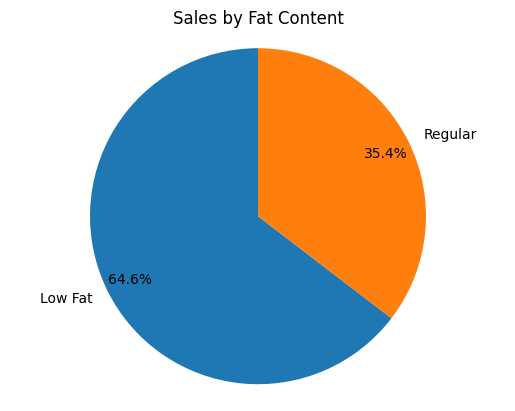

In [40]:
# Extract Labels and Values for the Pie Chart
labels = sales_by_fat['Item Fat Content']
values = sales_by_fat['Total Sales']

# Create the pie chart
plt.pie(values, labels = labels, autopct = '%1.1f%%', startangle = 90,
        pctdistance = 0.85)
plt.title('Sales by Fat Content')
plt.axis('equal')
plt.show

### Total Sales by Item Type

In [42]:
# Group by 'Item Type' and calculate the sum of 'Sales'

sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

# Extract the item types and total sales values for each item type
item_type = sales_by_type.index
values = sales_by_type.values

<function matplotlib.pyplot.show(close=None, block=None)>

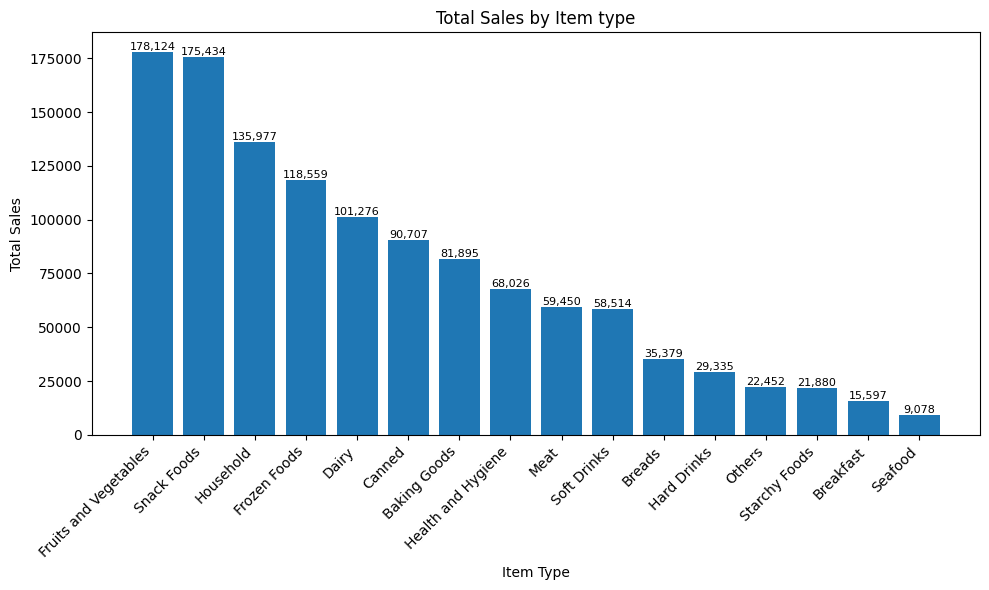

In [49]:
# Create the bar chart

plt.figure(figsize=(10, 6))
bars = plt.bar(item_type, values)

# Add title and Labels

plt.xticks(rotation=45, ha = 'right')
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item type')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():,.0f}', ha = 'center', va = 'bottom', fontsize = 8)

# Display the chart

plt.tight_layout()
plt.show

## Fat Content by Outlet for Total Sales

<function matplotlib.pyplot.show(close=None, block=None)>

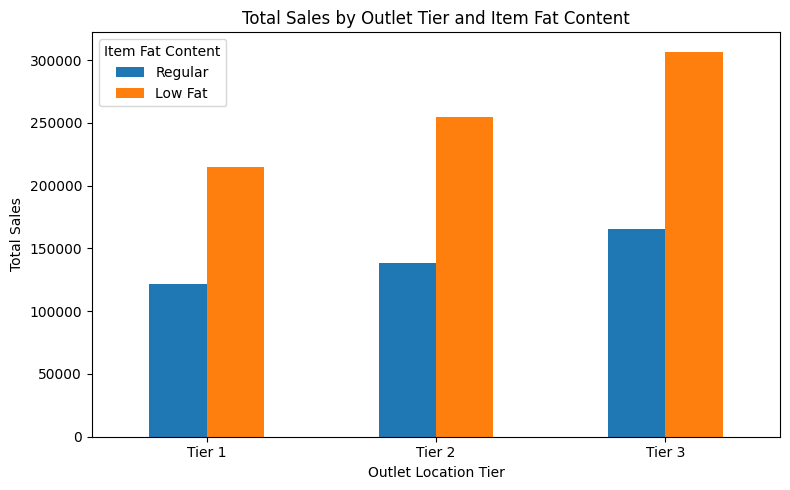

In [54]:
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular', 'Low Fat']]

# Create the grouped bar chart
ax = grouped.plot(kind = 'bar', figsize=(8, 5), title = 'Total Sales by Outlet Tier and Item Fat Content')
plt.xticks(rotation = 0)
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title = 'Item Fat Content')
plt.tight_layout()
plt.show

## Total Sales by Outlet Establishment Year

Outlet Establishment Year
1998    204522.2570
2000    131809.0156
2010    132113.3698
2011     78131.5646
2012    130476.8598
2015    130942.7782
2017    133103.9070
2020    129103.9564
2022    131477.7724
Name: Sales, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

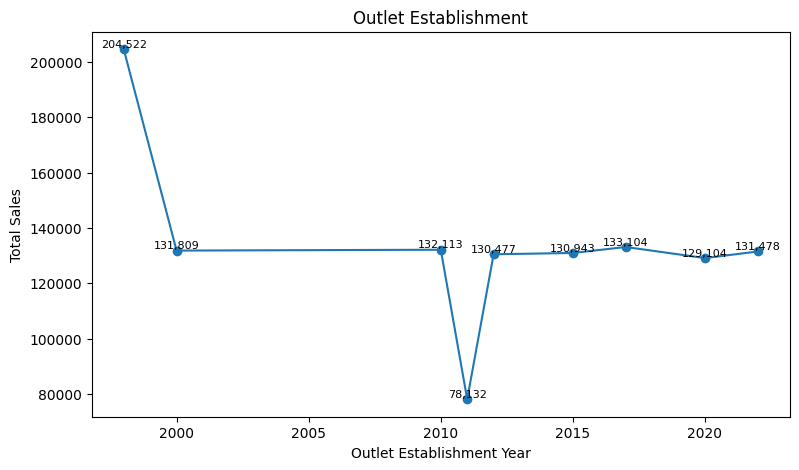

In [58]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()
print(sales_by_year)

# Create the line chart
plt.figure(figsize=(9,5))
plt.plot(sales_by_year.index, sales_by_year.values, marker = 'o', linestyle = '-')

# Add titles and labels
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment')

for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f'{y:,.0f}', ha = 'center', va = 'bottom', fontsize = 8)

plt.tight_layout
plt.show

## Total Sales by Outlet Size

Outlet Size
High      248991.5840
Medium    507895.7284
Small     444794.1684
Name: Sales, dtype: float64


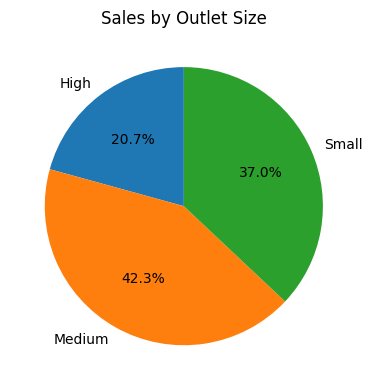

In [62]:
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()
print(sales_by_size)

# Create the pie chart

plt.figure(figsize=(6, 4))
plt.pie(sales_by_size, labels = sales_by_size.index, autopct = '%1.1f%%', startangle = 90)
plt.title('Sales by Outlet Size')
plt.tight_layout()
plt.show()

## Total Sales by Outlet Location

  Outlet Location Type        Sales
2               Tier 3  472133.0272
1               Tier 2  393150.6416
0               Tier 1  336397.8120


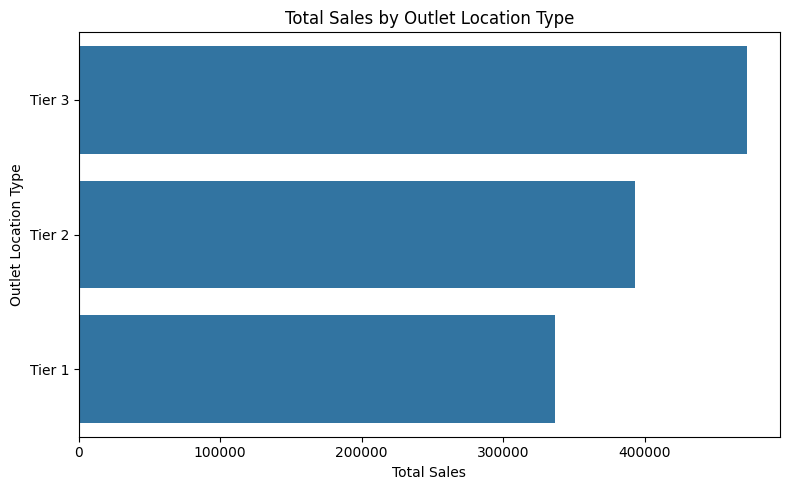

In [67]:
sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values('Sales', ascending = False)
print(sales_by_location)

# Create the chart
plt.figure(figsize=(8, 5))
ax = sns.barplot(x = 'Sales', y = 'Outlet Location Type', data = sales_by_location)

# Add titles and labels
plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')

plt.tight_layout()
plt.show()